In [ ]:
#| default_exp visualize

In [ ]:
#| hide
from nbdev.showdoc import *

# visualize
> This module will contain the functions used to visualize audio, data, loss, ect.

In [ ]:
#| export
import librosa
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes
from fastspeech.loading import load_audio
from matplotlib.patches import Rectangle
from numpy import array
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
#| hide
from fastspeech.loading import get_audio_files, melspectrogram
from functools import partial

In [ ]:
#| hide
sr = 22050
file_paths = get_audio_files("../sample_data/")
wavs = list(map(partial(load_audio, sr=sr), file_paths))
mels = list(map(melspectrogram, wavs))
wav, mel = wavs[0], mels[0]

## audio

In [ ]:
#| export
def plot(arr, title, xlabel, ylabel): # The tensor of sampled waveform
    plt.plot(arr)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

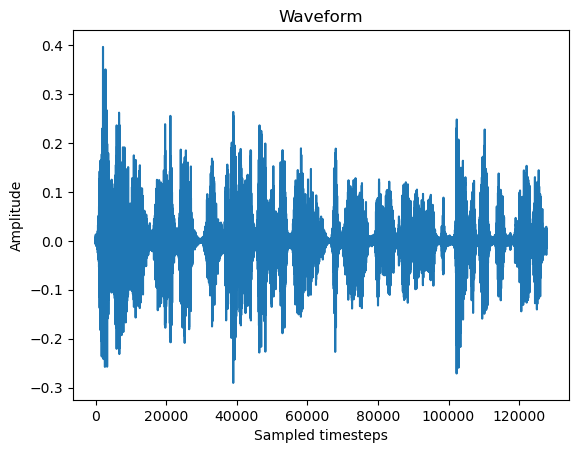

In [ ]:
plot(wav, "Waveform", "Sampled timesteps", "Amplitude")

In [ ]:
#| export
def show_mel(mel: array, title: str="", ax=None, show=True):
    if ax == None: fig, ax = plt.subplots()
    ax.imshow(librosa.power_to_db(mel), origin="lower")
    plt.title(title)
    if show: plt.show()

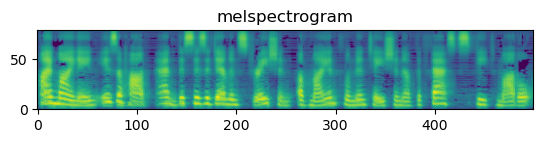

In [ ]:
show_mel(mel, title="melspectrogram")

In [ ]:
#| export
def show_mels(mels: list[array]): # List of melspectrograms
    num_mels = len(mels)
    fig, axes = plt.subplots(nrows=num_mels, ncols=1, figsize=(10, 2*num_mels))
    for i, mel in enumerate(mels):
        im = axes[i].imshow(librosa.power_to_db(mel), origin='lower')
        axes[i].set(title=f'MelSpectrogram {i}')
    plt.tight_layout()
    plt.show()
    plt.close()

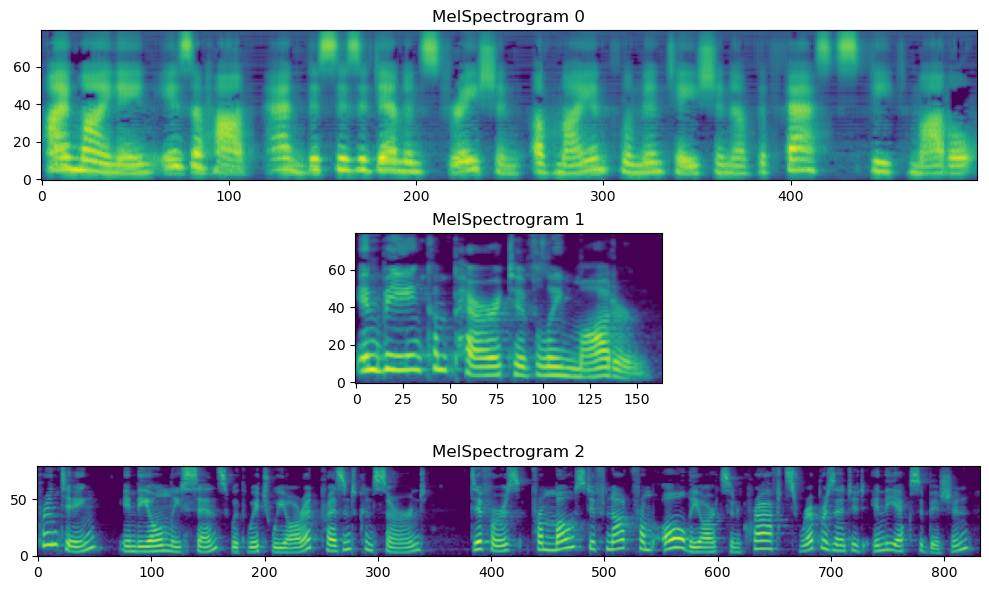

In [ ]:
show_mels(mels)

In [ ]:
#| export
class MelAnimation:
    def __init__(self, mels):
        self.i, self.mels = 0, mels
        
    def _view_one(self, d):
        if d: self.i += 1
        self.ax.clear()
        show_mel(self.mels[self.i], self.ax, show=False)
        
    def animate_mels(self):
        self.fig, self.ax= plt.subplots()
        self.ani = FuncAnimation(self.fig, self._view_one, 
                    frames=len(self.mels), interval=500, repeat=False)
        plt.close()
        return HTML(self.ani.to_jshtml())

## phones and durations

In [ ]:
#| export
def plot_phoneme_durations(phonemes: list[str], # A list of phoneme strings
                           durations: list[float], # A list of durations that align with phonemes
                           ax: Axes = None): # A matplotlib Axes to overlay over
    if ax is None:
        _, ax = plt.subplots()

    y, height = 0, 1
    for i, (phoneme, duration) in enumerate(zip(phonemes, durations)):
        ax.add_patch(Rectangle((sum(durations[:i]), y), duration, height, edgecolor='black', facecolor='none'))
        ax.text(sum(durations[:i]) + duration / 2, y + height / 2, phoneme, ha='center', va='center')

    ax.set(xlabel='mel duration', title='Phoneme Durations',
           xlim=(0, sum(durations)), ylim=(0, height))
    ax.yaxis.set_visible(False)

    if ax is None:
        plt.show()

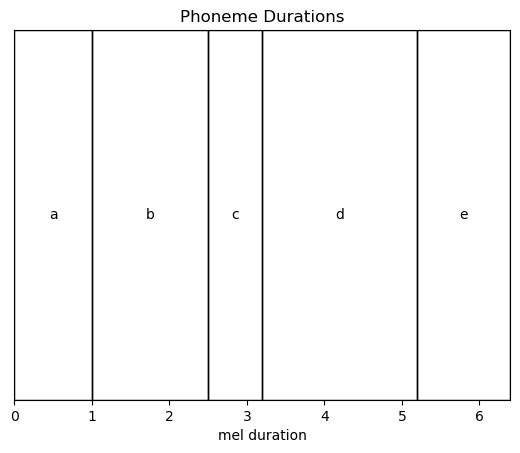

In [ ]:
phonemes = ['a', 'b', 'c', 'd', 'e']
durations = [1.0, 1.5, 0.7, 2.0, 1.2]
plot_phoneme_durations(phonemes, durations)

## training

In [ ]:
#| export
def plot_loss(loss: list, # The list containing loss measurements
              title: str = "training"): # Which set of loss you are plotting
    plt.plot(loss)
    plt.title(f"{title} loss")
    plt.xlabel("steps")
    plt.ylabel("loss")

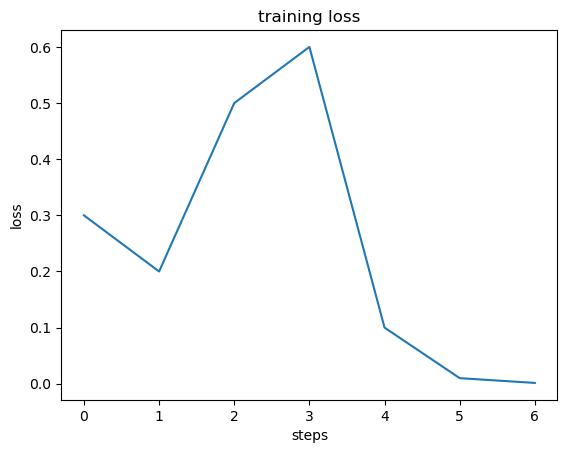

In [ ]:
loss = [0.3, 0.2, 0.5, 0.6, 0.1, 0.01, 0.0015]
plot_loss(loss)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()